You can suppress warnings in Python using the warnings module. Here's how you can do it:



In [ ]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Week 1 Task

## Web scrapping

## Task 1 b
- download data from link
    - https://en.wikipedia.org/wiki/List_of_airlines_of_the_United_States

In [ ]:
import requests  # For making HTTP requests to fetch web pages
import pandas as pd  # For handling and manipulating tabular data
from bs4 import BeautifulSoup  # For parsing HTML content

# URL of the Wikipedia page containing the list of U.S. airlines
url = "https://en.wikipedia.org/wiki/List_of_airlines_of_the_United_States"

# Send a GET request to the webpage and fetch the content
response = requests.get(url)

# Ensure the request was successful (status code 200); otherwise, raise an error
response.raise_for_status()

# Parse the HTML content of the webpage using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find all tables on the page with the class "wikitable" (Wikipedia's table format)
tables = soup.find_all('table', {'class': 'wikitable'})

# Check if any tables were found, and raise an error if not
if not tables:
    raise Exception("No tables found on the page. Check the structure of the webpage.")

# Select the first "wikitable" which typically contains active airlines information
active_airlines_table = tables[0]

# Extract table headers (column names) by finding all 'th' elements
headers = [header.text.strip() for header in active_airlines_table.find_all('th')]

# Initialize an empty list to store rows of airline data
rows = []

# Loop through all rows (skip the header row by starting from index 1)
for row in active_airlines_table.find_all('tr')[1:]:
    # Get all cells (both 'td' and 'th' elements) from the current row
    cells = row.find_all(['td', 'th'])

    # Extract the text from each cell, stripping leading/trailing whitespace
    cells_text = [cell.text.strip() for cell in cells]

    # Append the extracted row data to the rows list
    rows.append(cells_text)

# Create a DataFrame from the extracted data using Pandas
airlines_df = pd.DataFrame(rows, columns=headers)

# Display the first few rows of the DataFrame to verify the result
#print(airlines_df.head())

# Save the DataFrame to a CSV file for further analysis or storage
airlines_df.to_csv('us_airlines_list.csv', index=False)

print("Data successfully saved to 'us_airlines_list.csv'")

Data successfully saved to 'us_airlines_list.csv'


## Task 1 d

 - download data from link
    - https://en.wikipedia.org/wiki/List_of_the_busiest_airports_in_the_United_States

In [ ]:
# Import required libraries
import pandas as pd  # For data manipulation and analysis
import requests  # To fetch web page data
from bs4 import BeautifulSoup  # To parse HTML content

# Wikipedia URL
url = 'https://en.wikipedia.org/wiki/List_of_the_busiest_airports_in_the_United_States'

# Fetch the web page content
response = requests.get(url)  # Send an HTTP request and get the page content

# Parse the content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')  # Parse HTML content with BeautifulSoup

# Find all tables with class 'wikitable'
tables = soup.find_all('table', class_='wikitable')  # Locate all tables with the specified class

# Helper function to extract table data as DataFrame
def extract_table_data(table):
    # Extract headers (column names) from the table
    headers = [header.text.strip() for header in table.find_all('th')]

    # Extract rows of data
    rows = []
    for row in table.find_all('tr')[1:]:  # Skip the header row
        columns = row.find_all('td')  # Find all columns (data cells) in the row
        row_data = [col.text.strip() for col in columns]  # Clean and store the text data

        # Ensure the row matches the header length (to prevent misalignment)
        if row_data and len(row_data) == len(headers):
            rows.append(row_data)  # Add the cleaned row to the list

    # Create and return a DataFrame from extracted headers and rows
    return pd.DataFrame(rows, columns=headers)

# Extract Table 1 (Large Hubs) and Table 2 (Medium Hubs)
table_1_df = extract_table_data(tables[0])  # First table (Large Hubs)
table_2_df = extract_table_data(tables[1])  # Second table (Medium Hubs)

# Display the original columns for both tables
#print(f"Original Table 1 Columns: {table_1_df.columns}")  # Output columns of Table 1
#print(f"Original Table 2 Columns: {table_2_df.columns}")  # Output columns of Table 2

# Rename columns to have consistent names
table_1_df.rename(columns={
    'Airport (large hubs)': 'Airports',  # Rename 'Airport (large hubs)' to 'Airports'
    'City served': 'City'  # Rename 'City served' to 'City'
}, inplace=True)

table_2_df.rename(columns={
    'Airport (medium hubs)': 'Airports',  # Rename 'Airport (medium hubs)' to 'Airports'
    'Major cities served': 'City'  # Rename 'Major cities served' to 'City'
}, inplace=True)

# Add a new column "Hub" to identify the hub type
table_1_df['Hub'] = 'Large'  # Add 'Large' label to all rows of Table 1
table_2_df['Hub'] = 'Medium'  # Add 'Medium' label to all rows of Table 2

# Ensure both DataFrames have aligned columns before merging
#print(f"Updated Table 1 Columns: {table_1_df.columns}")  # Confirm updated columns of Table 1
#print(f"Updated Table 2 Columns: {table_2_df.columns}")  # Confirm updated columns of Table 2

# Merge the two tables into a single DataFrame
merged_df = pd.concat([table_1_df, table_2_df], ignore_index=True)  # Combine both tables row-wise

# Display the merged DataFrame
#print(merged_df.head())  # Display the first 5 rows of the merged DataFrame

# Save the merged dataset to a CSV file
merged_df.to_csv('merged_airports.csv', index=False)  # Export the merged DataFrame to a CSV file

# Confirmation message
print("Merged data saved to 'merged_airports.csv'")  # Notify the user that the data was saved


Merged data saved to 'merged_airports.csv'


## Task 1 a and 1c

In [ ]:
import pandas as pd

# Read Excel file
excel_file_path = "Airlines.xlsx"
df1 = pd.read_excel(excel_file_path)

# Read Excel file
excel_file_path = "airports.xlsx"
df2 = pd.read_excel(excel_file_path)

# Read Excel file
excel_file_path = "runways.xlsx"
df3 = pd.read_excel(excel_file_path)

# Read Excel file
excel_file_path = "us_airlines_list.csv"
df4 = pd.read_csv(excel_file_path)

# Read Excel file
excel_file_path = "us_busiest_airports.csv"
df5 = pd.read_csv(excel_file_path)

In [ ]:
# Import necessary libraries
import pandas as pd

# Sample DataFrames (replace these with your actual DataFrames)
# df1, df2, and df3 should already be defined

# Perform an outer join on 'id' across all three DataFrames
df6 = pd.merge(df1, df2, on='id', how='outer')  # Merge df1 and df2

df6 = pd.merge(df6, df3, on='id', how='outer')  # Merge the result with df3

# Display merged DataFrame
#print(df6.head())

# Save the merged DataFrame to a CSV file
df6.to_csv('df6.csv', index=False)

#print("Merged DataFrame saved to 'merged_outer_join.csv'")

## Task 4

In [ ]:
# hidder task merger of data

import pandas as pd

# Assuming df5 and df6 are already loaded as DataFrames

# Merging df5 and df6 on the common columns
# "IATACode" from df5 and "iata_code" from df6
df7 = pd.merge(df5, df6, left_on='IATACode', right_on='iata_code', how='inner')

# Save the merged DataFrame to a CSV file
#df7.to_csv('df7.csv', index=False)

# Display the first few rows of the merged DataFrame
#print(df7.head())


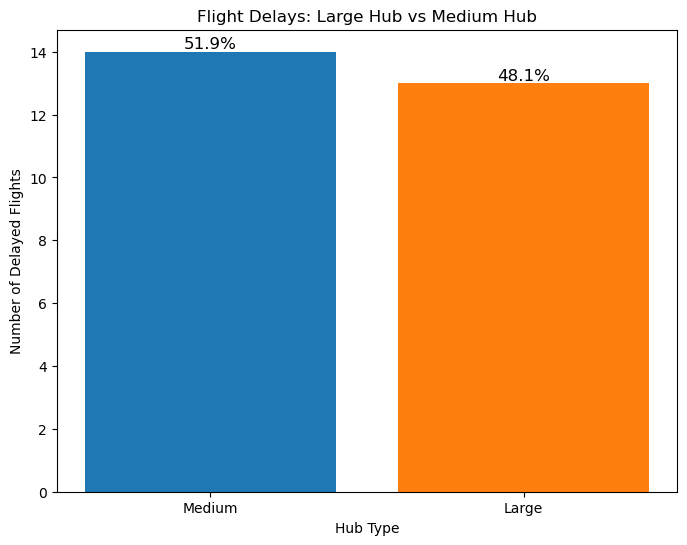

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df7 is already loaded
# Sample structure: df7 = pd.DataFrame({'hub': ['Large', 'Medium', 'Large'], 'Delay': [1, 0, 1]})

# Filter delayed flights
delayed_flights = df7[df7['Delay'] == 1]

# Count delays by hub
delay_counts = delayed_flights['Hub'].value_counts()

total_delays = delay_counts.sum()

# Visualization
plt.figure(figsize=(8, 6))
plt.bar(delay_counts.index, delay_counts.values, color=['#1f77b4', '#ff7f0e'])

# Add cumulative percentages on top of each bar
for i, value in enumerate(delay_counts.values):
    percentage = (value / total_delays) * 100
    plt.text(i, value, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=12)

plt.title('Flight Delays: Large Hub vs Medium Hub')
plt.xlabel('Hub Type')
plt.ylabel('Number of Delayed Flights')
plt.show()


## Task 2

### Task 2_df1

In [ ]:
# Calculate the missing value percentage for each column
missing_percentage = (df1.isnull().sum() / len(df1)) * 100

# Create a DataFrame to display the missing value percentage
missing_df = pd.DataFrame({'Column': df1.columns, 'Missing Percentage': missing_percentage})

# Print the DataFrame
print("Missing Value Percentage:")
print(missing_df)


Missing Value Percentage:
                  Column  Missing Percentage
id                    id                 0.0
Airline          Airline                 0.0
Flight            Flight                 0.0
AirportFrom  AirportFrom                 0.0
AirportTo      AirportTo                 0.0
DayOfWeek      DayOfWeek                 0.0
Time                Time                 0.0
Length            Length                 0.0
Delay              Delay                 0.0


- When departure time is measured in minutes from midnight (in the range 10 to 1439), it represents the time of day in terms of the number of minutes elapsed since 12:00 AM (midnight).

- Here’s a breakdown:

    - 10 minutes means 12:10 AM (10 minutes after midnight).
    - 60 minutes means 1:00 AM (1 hour after midnight).
    - 1439 minutes is 11:59 PM (1 minute before midnight).

- How to convert minutes to standard time:

You can convert minutes to hours and minutes using this formula:

  - Hours = minutes // 60 (integer division)
  - Minutes = minutes % 60 (remainder)

- ✅ Examples:

    - 480 minutes → 8:00 AM (8 × 60 = 480)
    - 1020 minutes → 5:00 PM (1020 ÷ 60 = 17 hours or 5 PM)
    - 1300 minutes → 9:40 PM (1300 ÷ 60 = 21 hours, 40 minutes)

In [ ]:
# Function to convert minutes from midnight to standard time format
def minutes_to_time(minutes):
    # Ensure the input is within the valid range (10 to 1439)
    if minutes < 10 or minutes > 1439:
        return "Invalid time range. Must be between 10 and 1439 minutes."

    # Calculate hours and minutes
    hours = minutes // 60
    mins = minutes % 60

    # Determine AM or PM
    period = "AM" if hours < 12 else "PM"

    # Convert to 12-hour format
    if hours == 0:
        hours = 12  # Midnight case
    elif hours > 12:
        hours -= 12  # Convert to 12-hour format

    # Format time as a string
    return f"{hours}:{mins:02d} {period}"

# Test the function with some example values
example_minutes = [10, 60, 480, 1020, 1300, 1439]
for mins in example_minutes:
    print(f"{mins} minutes from midnight → {minutes_to_time(mins)}")

10 minutes from midnight → 12:10 AM
60 minutes from midnight → 1:00 AM
480 minutes from midnight → 8:00 AM
1020 minutes from midnight → 5:00 PM
1300 minutes from midnight → 9:40 PM
1439 minutes from midnight → 11:59 PM


### Task 2_df2

In [ ]:
# Calculate the missing value percentage for each column
missing_percentage = (df2.isnull().sum() / len(df2)) * 100

# Create a DataFrame to display the missing value percentage
missing_df = pd.DataFrame({'Column': df2.columns, 'Missing Percentage': missing_percentage})

# Print the DataFrame
print("Missing Value Percentage:")
print(missing_df)

Missing Value Percentage:
                              Column  Missing Percentage
id                                id            0.000000
ident                          ident            0.000000
type                            type            0.000000
name                            name            0.000000
latitude_deg            latitude_deg            0.000000
longitude_deg          longitude_deg            0.000000
elevation_ft            elevation_ft           19.134205
continent                  continent           48.396450
iso_country              iso_country            0.350925
iso_region                iso_region            0.000000
municipality            municipality            6.864034
scheduled_service  scheduled_service            0.000000
gps_code                    gps_code           41.743784
iata_code                  iata_code           87.588917
local_code                local_code           55.321455
home_link                  home_link           95.268613
wikip

In [ ]:
import pandas as pd

# Remove specified columns
columns_to_drop = ['continent', 'gps_code', 'iata_code', 'local_code', 'home_link', 'wikipedia_link', 'keywords','municipality']
df2.drop(columns=columns_to_drop, inplace=True)


In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

# Create a KNN imputer object
knn_imputer = KNNImputer(n_neighbors=5)

# Fill missing values in 'elevation_ft' column
df2['elevation_ft'] = knn_imputer.fit_transform(df2[['elevation_ft']])

In [ ]:
# Fill missing values in categorical columns with the most frequent value
df2['iso_country'].fillna(df2['iso_country'].mode()[0], inplace=True)

In [ ]:
# Calculate the missing value percentage for each column
missing_percentage = (df2.isnull().sum() / len(df2)) * 100

# Create a DataFrame to display the missing value percentage
missing_df = pd.DataFrame({'Column': df2.columns, 'Missing Percentage': missing_percentage})

# Print the DataFrame
print("Missing Value Percentage:")
print(missing_df)

Missing Value Percentage:
                              Column  Missing Percentage
id                                id                 0.0
ident                          ident                 0.0
type                            type                 0.0
name                            name                 0.0
latitude_deg            latitude_deg                 0.0
longitude_deg          longitude_deg                 0.0
elevation_ft            elevation_ft                 0.0
iso_country              iso_country                 0.0
iso_region                iso_region                 0.0
scheduled_service  scheduled_service                 0.0


### Task 2_df3

In [ ]:
# Calculate the missing value percentage for each column
missing_percentage = (df3.isnull().sum() / len(df3)) * 100

# Create a DataFrame to display the missing value percentage
missing_df = pd.DataFrame({'Column': df3.columns, 'Missing Percentage': missing_percentage})

# Print the DataFrame
print("Missing Value Percentage:")
print(missing_df)

Missing Value Percentage:
                                              Column  Missing Percentage
id                                                id            0.000000
airport_ref                              airport_ref            0.000000
airport_ident                          airport_ident            0.000000
length_ft                                  length_ft            0.509357
width_ft                                    width_ft            6.569343
surface                                      surface            1.043727
lighted                                      lighted            0.000000
closed                                        closed            0.000000
le_ident                                    le_ident            0.418401
le_latitude_deg                      le_latitude_deg           65.854879
le_longitude_deg                    le_longitude_deg           65.891261
le_elevation_ft                      le_elevation_ft           70.937081
le_heading_degT          

In [ ]:
# Remove specified columns
columns_to_drop = ['le_latitude_deg',
       'le_longitude_deg', 'le_elevation_ft', 'le_heading_degT',
       'le_displaced_threshold_ft', 'he_latitude_deg',
       'he_longitude_deg', 'he_elevation_ft', 'he_heading_degT',
       'he_displaced_threshold_ft']
df3.drop(columns=columns_to_drop, inplace=True)

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

# Define columns with missing values
missing_columns = ['length_ft', 'width_ft']

# Create KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)  # You can adjust n_neighbors as needed

# Fill missing values
df3[missing_columns] = knn_imputer.fit_transform(df3[missing_columns])


In [ ]:
# Fill missing values in categorical columns with the most frequent value
df3['surface'].fillna(df3['surface'].mode()[0], inplace=True)

In [ ]:
# Fill missing values in alphanumeric columns with mode
columns_to_fill = ['le_ident', 'he_ident']
for column in columns_to_fill:
    mode_value = df3[column].mode()[0]  # Get the mode (most frequent value) of the column
    df3[column].fillna(mode_value, inplace=True)

# Save modified dataframe to Excel
#df3.to_excel('df3.xlsx', index=False)

In [ ]:
# Calculate the missing value percentage for each column
missing_percentage = (df3.isnull().sum() / len(df3)) * 100

# Create a DataFrame to display the missing value percentage
missing_df = pd.DataFrame({'Column': df3.columns, 'Missing Percentage': missing_percentage})

# Print the DataFrame
print("Missing Value Percentage:")
print(missing_df)

Missing Value Percentage:
                      Column  Missing Percentage
id                        id                 0.0
airport_ref      airport_ref                 0.0
airport_ident  airport_ident                 0.0
length_ft          length_ft                 0.0
width_ft            width_ft                 0.0
surface              surface                 0.0
lighted              lighted                 0.0
closed                closed                 0.0
le_ident            le_ident                 0.0
he_ident            he_ident                 0.0


### Task 2_df4

In [ ]:
# Calculate the missing value percentage for each column
missing_percentage = (df4.isnull().sum() / len(df4)) * 100

# Create a DataFrame to display the missing value percentage
missing_df = pd.DataFrame({'Column': df4.columns, 'Missing Percentage': missing_percentage})

# Print the DataFrame
print("Missing Value Percentage:")
print(missing_df)

Missing Value Percentage:
                                                      Column  \
Airline                                              Airline   
Image                                                  Image   
IATA                                                    IATA   
ICAO                                                    ICAO   
Callsign                                            Callsign   
Primary hubs,  secondary hubs  Primary hubs,  secondary hubs   
Founded                                              Founded   
Notes                                                  Notes   

                               Missing Percentage  
Airline                                  0.000000  
Image                                  100.000000  
IATA                                     0.000000  
ICAO                                     0.000000  
Callsign                                 0.000000  
Primary hubs,  secondary hubs            0.000000  
Founded                          

In [ ]:
# Delete the 'Image' column from df5 if it exists
if 'Image' in df4.columns:
    df4.drop('Image', axis=1, inplace=True)  # Remove the 'Image' column

# Delete rows with missing values in the 'Notes' column
df4.dropna(subset=['Notes'], inplace=True)  # Drop rows where 'Notes' column has missing values

# Display updated DataFrame
#print(df4.head())

In [ ]:
# Calculate the missing value percentage for each column
missing_percentage = (df4.isnull().sum() / len(df4)) * 100

# Create a DataFrame to display the missing value percentage
missing_df = pd.DataFrame({'Column': df4.columns, 'Missing Percentage': missing_percentage})

# Print the DataFrame
print("Missing Value Percentage:")
print(missing_df)

Missing Value Percentage:
                                                      Column  \
Airline                                              Airline   
IATA                                                    IATA   
ICAO                                                    ICAO   
Callsign                                            Callsign   
Primary hubs,  secondary hubs  Primary hubs,  secondary hubs   
Founded                                              Founded   
Notes                                                  Notes   

                               Missing Percentage  
Airline                                       0.0  
IATA                                          0.0  
ICAO                                          0.0  
Callsign                                      0.0  
Primary hubs,  secondary hubs                 0.0  
Founded                                       0.0  
Notes                                         0.0  


### Task 2_df5

In [ ]:
# Calculate the missing value percentage for each column
missing_percentage = (df5.isnull().sum() / len(df5)) * 100

# Create a DataFrame to display the missing value percentage
missing_df = pd.DataFrame({'Column': df5.columns, 'Missing Percentage': missing_percentage})

# Print the DataFrame
print("Missing Value Percentage:")
print(missing_df)

Missing Value Percentage:
                      Column  Missing Percentage
Rank(2023)        Rank(2023)                 0.0
Airports            Airports                 0.0
IATACode            IATACode                 0.0
cities served  cities served                 0.0
Metro area        Metro area                 0.0
State                  State                 0.0
2023[2]              2023[2]                 0.0
2022[3]              2022[3]                 0.0
2021[4]              2021[4]                 0.0
2020[5]              2020[5]                 0.0
2019[6]              2019[6]                 0.0
2018[7]              2018[7]                 0.0
2017[8]              2017[8]                 0.0
2016[9]              2016[9]                 0.0
2015[10]            2015[10]                 0.0
2014[11]            2014[11]                 0.0
Hub                      Hub                 0.0


## Task 3a

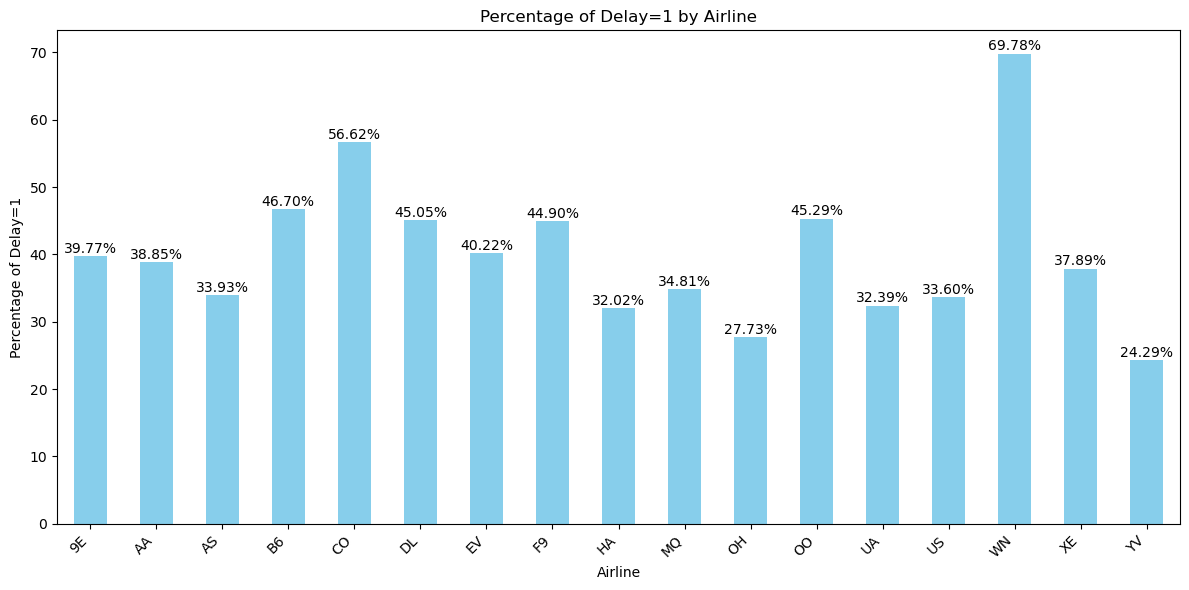

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter DataFrame to consider only '1' from Delay column
df_delay_1 = df1[df1['Delay'] == 1]

# Calculate percentage of flights with Delay=1 for each airline
percentage_delay_1 = (df_delay_1['Airline'].value_counts() / df1['Airline'].value_counts()) * 100

# Plot percentage
plt.figure(figsize=(12, 6))
percentage_delay_1.plot(kind='bar', color='skyblue')
plt.xlabel('Airline')
plt.ylabel('Percentage of Delay=1')
plt.title('Percentage of Delay=1 by Airline')
plt.xticks(rotation=45, ha='right')
# Add labels showing percentage value on top of each bar
for i, value in enumerate(percentage_delay_1):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center')
plt.tight_layout()
plt.show()


## Task 3b

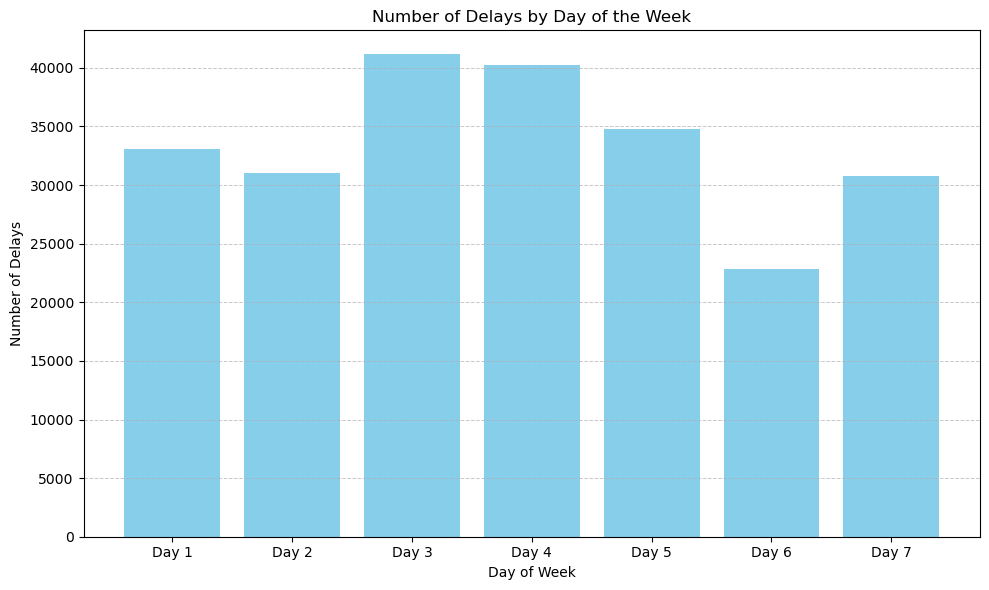

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the necessary columns exist
if 'DayOfWeek' not in df1.columns or 'Delay' not in df1.columns:
    raise ValueError("Ensure 'DayOfWeek' and 'Delay' columns exist in df1")

# Filter valid days and delays (1-7 for days, 1 for delays)
valid_days = range(1, 8)
df_filtered = df1[df1['DayOfWeek'].isin(valid_days) & (df1['Delay'] == 1)]

# Check for empty data after filtering
if df_filtered.empty:
    raise ValueError("No delays found in the dataset. Check input data.")

# Count the number of delays for each day of the week
delay_counts = df_filtered['DayOfWeek'].value_counts().reindex(valid_days, fill_value=0)

# Create the bar plot to visualize the count of delays per day
plt.figure(figsize=(10, 6))
plt.bar(delay_counts.index, delay_counts.values, tick_label=[f'Day {day}' for day in valid_days], color='skyblue')

plt.xlabel('Day of Week')
plt.ylabel('Number of Delays')
plt.title('Number of Delays by Day of the Week')
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

## Task 3c

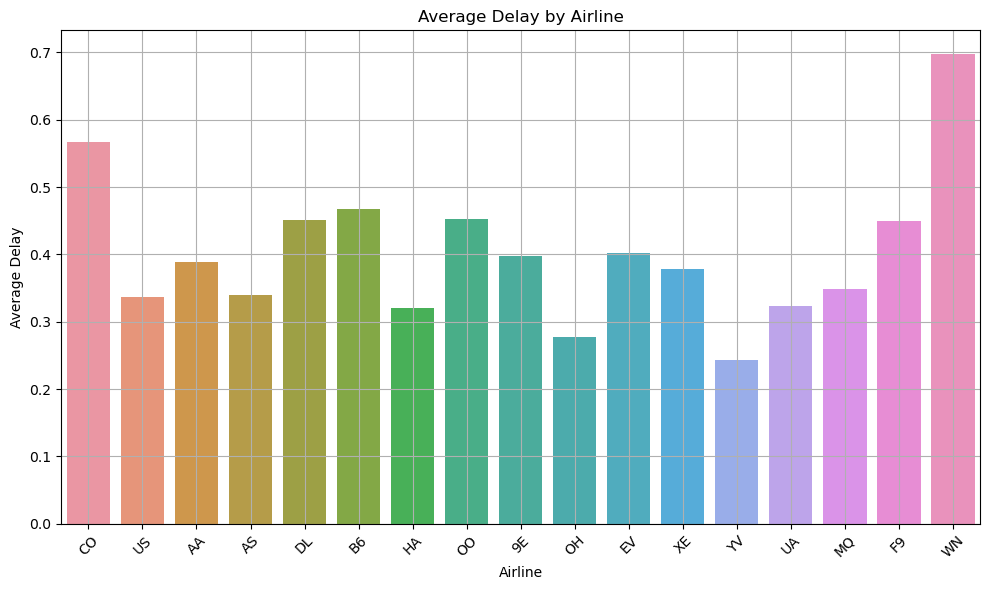

In [ ]:
import seaborn as sns

# Plot bar chart of 'Airline' vs 'Delay' using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df1, x='Airline', y='Delay', ci=None)
plt.title('Average Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Delay')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()


## Task 3d

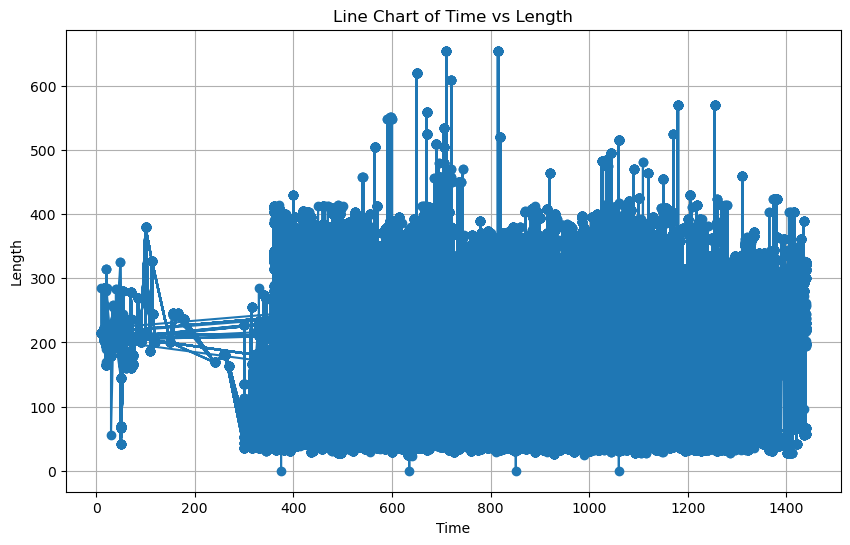

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded df1

# Plot line chart of 'Time' vs 'Length'
plt.figure(figsize=(10, 6))
plt.plot(df1['Time'], df1['Length'], marker='o', linestyle='-')
plt.title('Line Chart of Time vs Length')
plt.xlabel('Time')
plt.ylabel('Length')
plt.grid(True)
plt.show()


## Task 5a

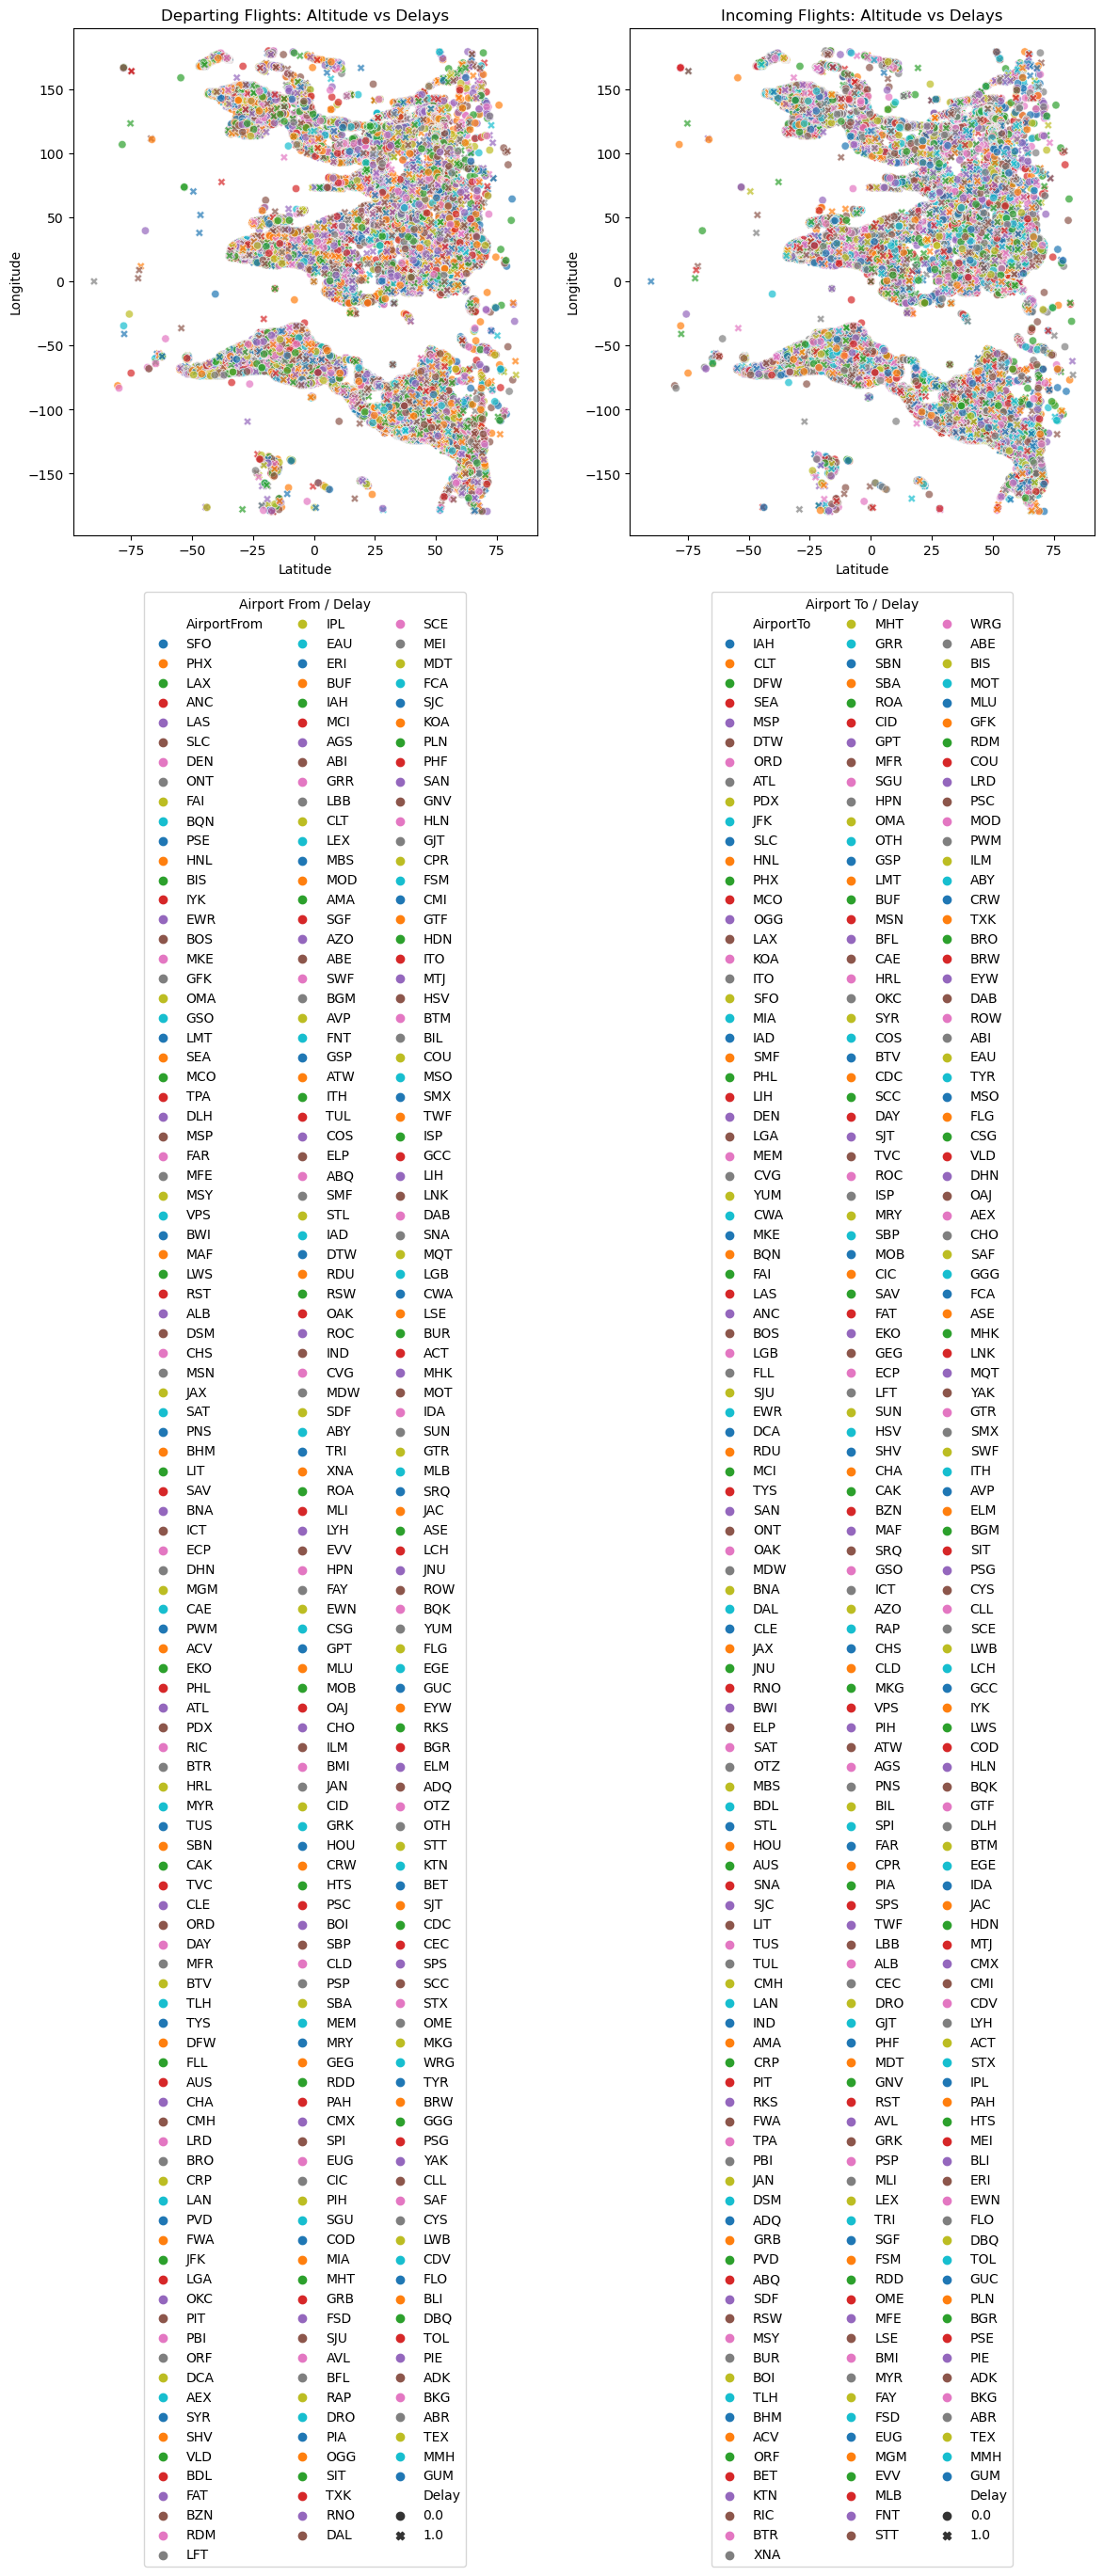

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df6 is already loaded
# Sample structure: df6 = pd.DataFrame({'AirportFrom': [...], 'AirportTo': [...], 'latitude_deg': [...], 'longitude_deg': [...], 'Delay': [1, 0, 1]})

# Separate incoming and departing flights
departing_flights = df6[['AirportFrom', 'latitude_deg', 'longitude_deg', 'Delay']]
incoming_flights = df6[['AirportTo', 'latitude_deg', 'longitude_deg', 'Delay']]

# Visualization
plt.figure(figsize=(14, 7))

# Departing flight altitude vs delay
plt.subplot(1, 2, 1)
sns.scatterplot(x='latitude_deg', y='longitude_deg', data=departing_flights, hue='AirportFrom', style='Delay', alpha=0.7, palette='tab10')
plt.title('Departing Flights: Altitude vs Delays')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(title='Airport From / Delay', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

# Incoming flight altitude vs delay
plt.subplot(1, 2, 2)
sns.scatterplot(x='latitude_deg', y='longitude_deg', data=incoming_flights, hue='AirportTo', style='Delay', alpha=0.7, palette='tab10')
plt.title('Incoming Flights: Altitude vs Delays')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(title='Airport To / Delay', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

plt.tight_layout()
plt.show()


## Task 5b

- No column in any of data sheets says anything about number of runways at an airport.

## Task 5c

Mean flight length (Delayed): 135.39624939633916
Mean flight length (Non-Delayed): 129.60683072879146


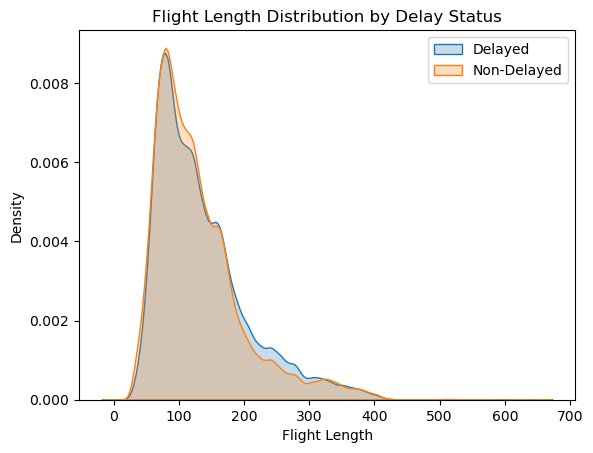

T-statistic: 29.1748, P-value: 0.0000
There is a statistically significant relationship between flight length and delays.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Sample dataset (replace with your actual dataset)
# df1 = pd.read_csv("your_dataset.csv")

# Ensure relevant columns exist
if 'Length' not in df1.columns or 'Delay' not in df1.columns:
    raise ValueError("Dataset must contain 'Length' and 'Delay' columns")

# Separate flights by delay status
delayed_flights = df1[df1['Delay'] == 1]
non_delayed_flights = df1[df1['Delay'] == 0]

# Descriptive statistics
print("Mean flight length (Delayed):", delayed_flights['Length'].mean())
print("Mean flight length (Non-Delayed):", non_delayed_flights['Length'].mean())

# Visualize the distribution
sns.kdeplot(delayed_flights['Length'], label='Delayed', fill=True)
sns.kdeplot(non_delayed_flights['Length'], label='Non-Delayed', fill=True)
plt.legend()
plt.title('Flight Length Distribution by Delay Status')
plt.xlabel('Flight Length')
plt.ylabel('Density')
plt.show()

# Statistical test (t-test for independent samples)
t_stat, p_value = ttest_ind(delayed_flights['Length'], non_delayed_flights['Length'], equal_var=False)

print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

# Interpret results
if p_value < 0.05:
    print("There is a statistically significant relationship between flight length and delays.")
else:
    print("No significant relationship between flight length and delays.")

## Task 6

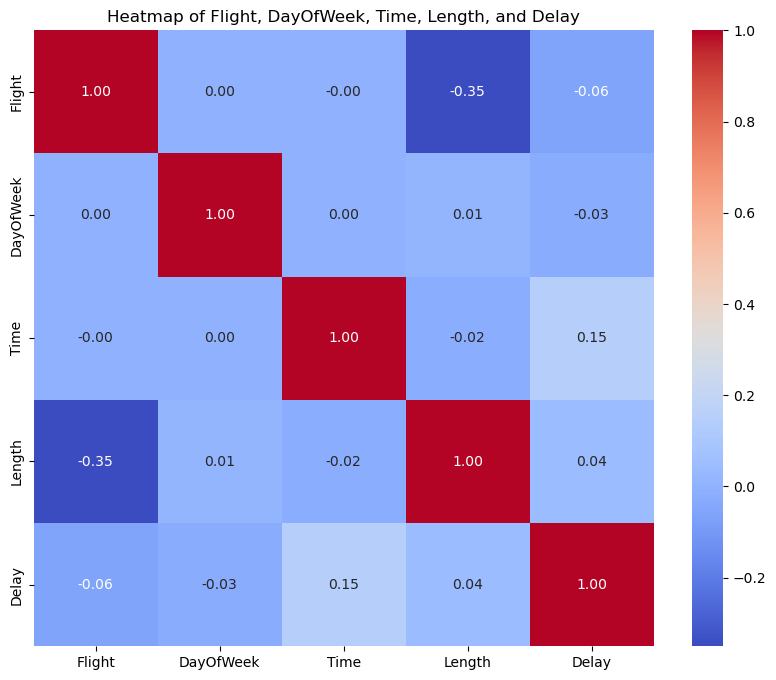

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns of interest
selected_columns = ['Flight', 'DayOfWeek', 'Time', 'Length', 'Delay']
df1_selected = df1[selected_columns]

# Create a correlation matrix for the selected columns
correlation_matrix = df1_selected.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Flight, DayOfWeek, Time, Length, and Delay')
plt.show()


## Bonus task

In [ ]:
# Save modified DataFrame to Excel
df1.to_csv('df1.csv', index=False)

# Save modified DataFrame to Excel
df2.to_csv('df2.csv', index=False)

# Save modified DataFrame to Excel
df3.to_csv('df3.csv', index=False)